# Harris Corner Detection

### Import resources and display image

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd '/content/drive/MyDrive/Udacity/Computer Vision Nanodegree/CVND_Exercises/1_3_Types_of_Features_Image_Segmentation'

/content/drive/MyDrive/Udacity/Computer Vision Nanodegree/CVND_Exercises/1_3_Types_of_Features_Image_Segmentation


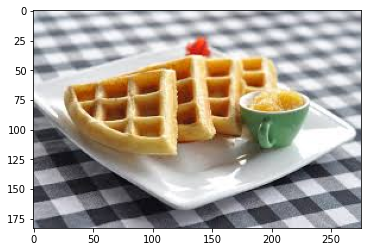

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/waffle.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

### Detect corners

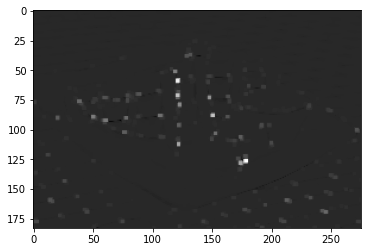

In [18]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detect corners
# (Note: cornerHarris takes in the grayscale float values 
# followed by the size of the neighborhood to look at when 
# identifying potential corners. Two means a two by two pixel 
# Square, and since the corners are well marked in this example, 
# a small window like this will work well. Then it takes in the 
# size of the Sobel operator, three which is our typical kernel size.  
# And lastly, a constant value that helps determine which points are 
# considered corners. A value of 0.04 Is typical. A slightly lower 
# value for this constant will result in more corners).
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')

### Extract and display strong corners

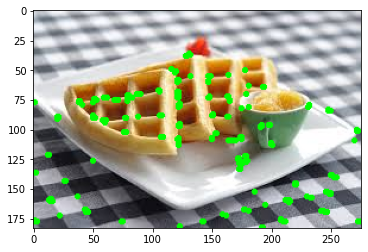

In [22]:
## COMPLETED: Define a threshold for extracting strong corners
# This value vary depending on the image and how many corners you want to detect
# Try changing this free parameter, 0.1, to be larger or smaller and see what happens
thresh = 0.05*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

plt.imshow(corner_image)